In [530]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
import cv2

from IPython.display import display
from pprint import pprint

In [801]:
# Read config
with open("labeling_config.yml", "r") as ymlfile:
    cfg = yaml.safe_load(ymlfile)

base = cfg['Base']
kfold_5_59_cfg = cfg['5_Kfold_Modify_59']
s_kfold_5_59_cfg = cfg['5_S_Kfold_Modify_59']
s_kfold_6_58_cfg = cfg['6_S_Kfold_Modify_58']

In [802]:
raw_df = pd.read_csv('../input/data/train/train.csv')
label_base = pd.read_csv('../label/Base/whole_label.csv')
label_kfold_5_59_cfg = {
    'whole' : pd.read_csv('../label/5_Kfold_Modify_59/whole_label.csv'),
    'train' : [pd.read_csv(f'../label/5_Kfold_Modify_59/kfold_label/train/{t}_fold_train_label.csv') for t in range(5)], 
    'val' : [pd.read_csv(f'../label/5_Kfold_Modify_59/kfold_label/val/{v}_fold_val_label.csv') for v in range(5)]
}
label_s_kfold_5_59_cfg = {
    'whole' : pd.read_csv('../label/5_S_Kfold_Modify_59/whole_label.csv'),
    'train' : [pd.read_csv(f'../label/5_S_Kfold_Modify_59/kfold_label/train/{t}_fold_train_label.csv') for t in range(5)], 
    'val' : [pd.read_csv(f'../label/5_S_Kfold_Modify_59/kfold_label/val/{v}_fold_val_label.csv') for v in range(5)]
}
label_s_kfold_6_58_cfg = {
    'whole' : pd.read_csv('../label/6_S_Kfold_Modify_58/whole_label.csv'),
    'train' : [pd.read_csv(f'../label/6_S_Kfold_Modify_58/kfold_label/train/{t}_fold_train_label.csv') for t in range(6)], 
    'val' : [pd.read_csv(f'../label/6_S_Kfold_Modify_58/kfold_label/val/{v}_fold_val_label.csv') for v in range(6)]
}

In [803]:
gender_abmigous_data_list = ['004432_male_Asian_43', '001498-1_male_Asian_23', '006359_female_Asian_18',
                             '006360_female_Asian_18', '006361_female_Asian_18', '006362_female_Asian_18',
                             '006363_female_Asian_18', '006364_female_Asian_18']

Result Analysis
===

## Check Gender Abmigous Data
---

**************Target : 004432_male_Asian_43***************


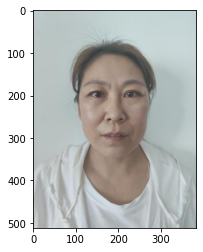

==========Has all ambiguous data been modified?==========
13384    True
13385    True
13386    True
13387    True
13388    True
13389    True
13390    True
Name: gender, dtype: bool


**************Target : 01498-1_male_Asian_23***************


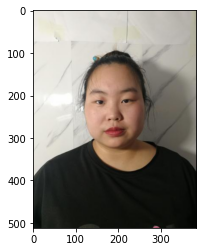

==========Has all ambiguous data been modified?==========
5348    True
5349    True
5350    True
5351    True
5352    True
5353    True
5354    True
Name: gender, dtype: bool


**************Target : 006359_female_Asian_18***************


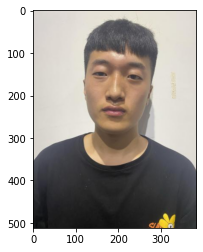

==========Has all ambiguous data been modified?==========
16793    True
16794    True
16795    True
16796    True
16797    True
16798    True
16799    True
Name: gender, dtype: bool


**************Target : 006360_female_Asian_18***************


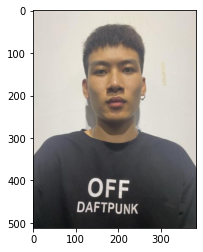

==========Has all ambiguous data been modified?==========
16800    True
16801    True
16802    True
16803    True
16804    True
16805    True
16806    True
Name: gender, dtype: bool


**************Target : 006361_female_Asian_18***************


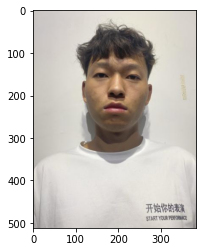

==========Has all ambiguous data been modified?==========
16807    True
16808    True
16809    True
16810    True
16811    True
16812    True
16813    True
Name: gender, dtype: bool


**************Target : 006362_female_Asian_18***************


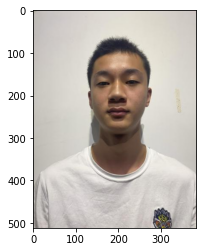

==========Has all ambiguous data been modified?==========
16814    True
16815    True
16816    True
16817    True
16818    True
16819    True
16820    True
Name: gender, dtype: bool


**************Target : 006363_female_Asian_18***************


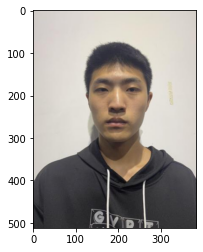

==========Has all ambiguous data been modified?==========
16821    True
16822    True
16823    True
16824    True
16825    True
16826    True
16827    True
Name: gender, dtype: bool


**************Target : 006364_female_Asian_18***************


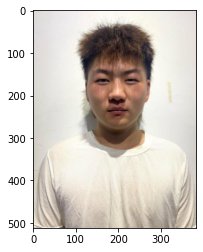

==========Has all ambiguous data been modified?==========
16828    True
16829    True
16830    True
16831    True
16832    True
16833    True
16834    True
Name: gender, dtype: bool




In [775]:
for abmg_data in gender_abmigous_data_list:
    # Base : modify_gender_ambiguity : False
    false_modify_ambiguity_gender = label_base['gender'][label_base['image_path'].str.contains(abmg_data)].iloc[0:7]
    
    # 5_Kfold_Modify_59 : modify_gender_ambiguity : True
    True_modify_ambiguity_gender = label_kfold_5_59_cfg['whole']['gender'][label_base['image_path'].str.contains(abmg_data)].iloc[0:7]
    
    print('*' * 14 + f'Target : {abmg_data}' + '*' * 15)
    img = cv2.imread(label_base['image_path'][label_base['image_path'].str.contains(abmg_data)].iloc[6])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
    print('=' * 10 + 'Has all ambiguous data been modified?' + '=' * 10)
    pprint(false_modify_ambiguity_gender != True_modify_ambiguity_gender)
    print('=' * 57 + '\n\n')

## Check age filter
---

In [774]:
print('*' * 7 + f'Find people of age to be checked' + '*' * 7)
raw_df_1 = raw_df.loc[(raw_df['age'] > 57) & (raw_df['age'] < 100)]
display(raw_df_1.head(5))

check_list = raw_df_1['path'].iloc[0:5].tolist()
print('\n\n' + '*' * 8 + f'Check List' + '*' * 8)
pprint(check_list)

# age_filter = 58
test_df = label_s_kfold_6_58_cfg['whole']
print('\n\n' + '=' * 20 + f'Result' + '=' * 20)
for check in check_list:
    display(test_df[['age', 'image_path']][test_df['image_path'].str.contains(check)].iloc[0:1])
print('=' * 46)

*******Find people of age to be checked*******


,id,gender,race,age,path
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
5,000007,female,Asian,58,000007_female_Asian_58
6,000008,female,Asian,58,000008_female_Asian_58
8,000010,female,Asian,58,000010_female_Asian_58




********Check List********
['000005_female_Asian_58',
 '000006_female_Asian_59',
 '000007_female_Asian_58',
 '000008_female_Asian_58',
 '000010_female_Asian_58']


====================Result====================


,age,image_path
21,2,../input/data/train/images/000005_female_Asian...


,age,image_path
28,2,../input/data/train/images/000006_female_Asian...


,age,image_path
35,2,../input/data/train/images/000007_female_Asian...


,age,image_path
42,2,../input/data/train/images/000008_female_Asian...


,age,image_path
56,2,../input/data/train/images/000010_female_Asian...


## K-Fold Label distribution
---

In [804]:
kfold = 5
train_df_5 = label_kfold_5_59_cfg['train']
val_df_5 = label_kfold_5_59_cfg['val']

### Class
---

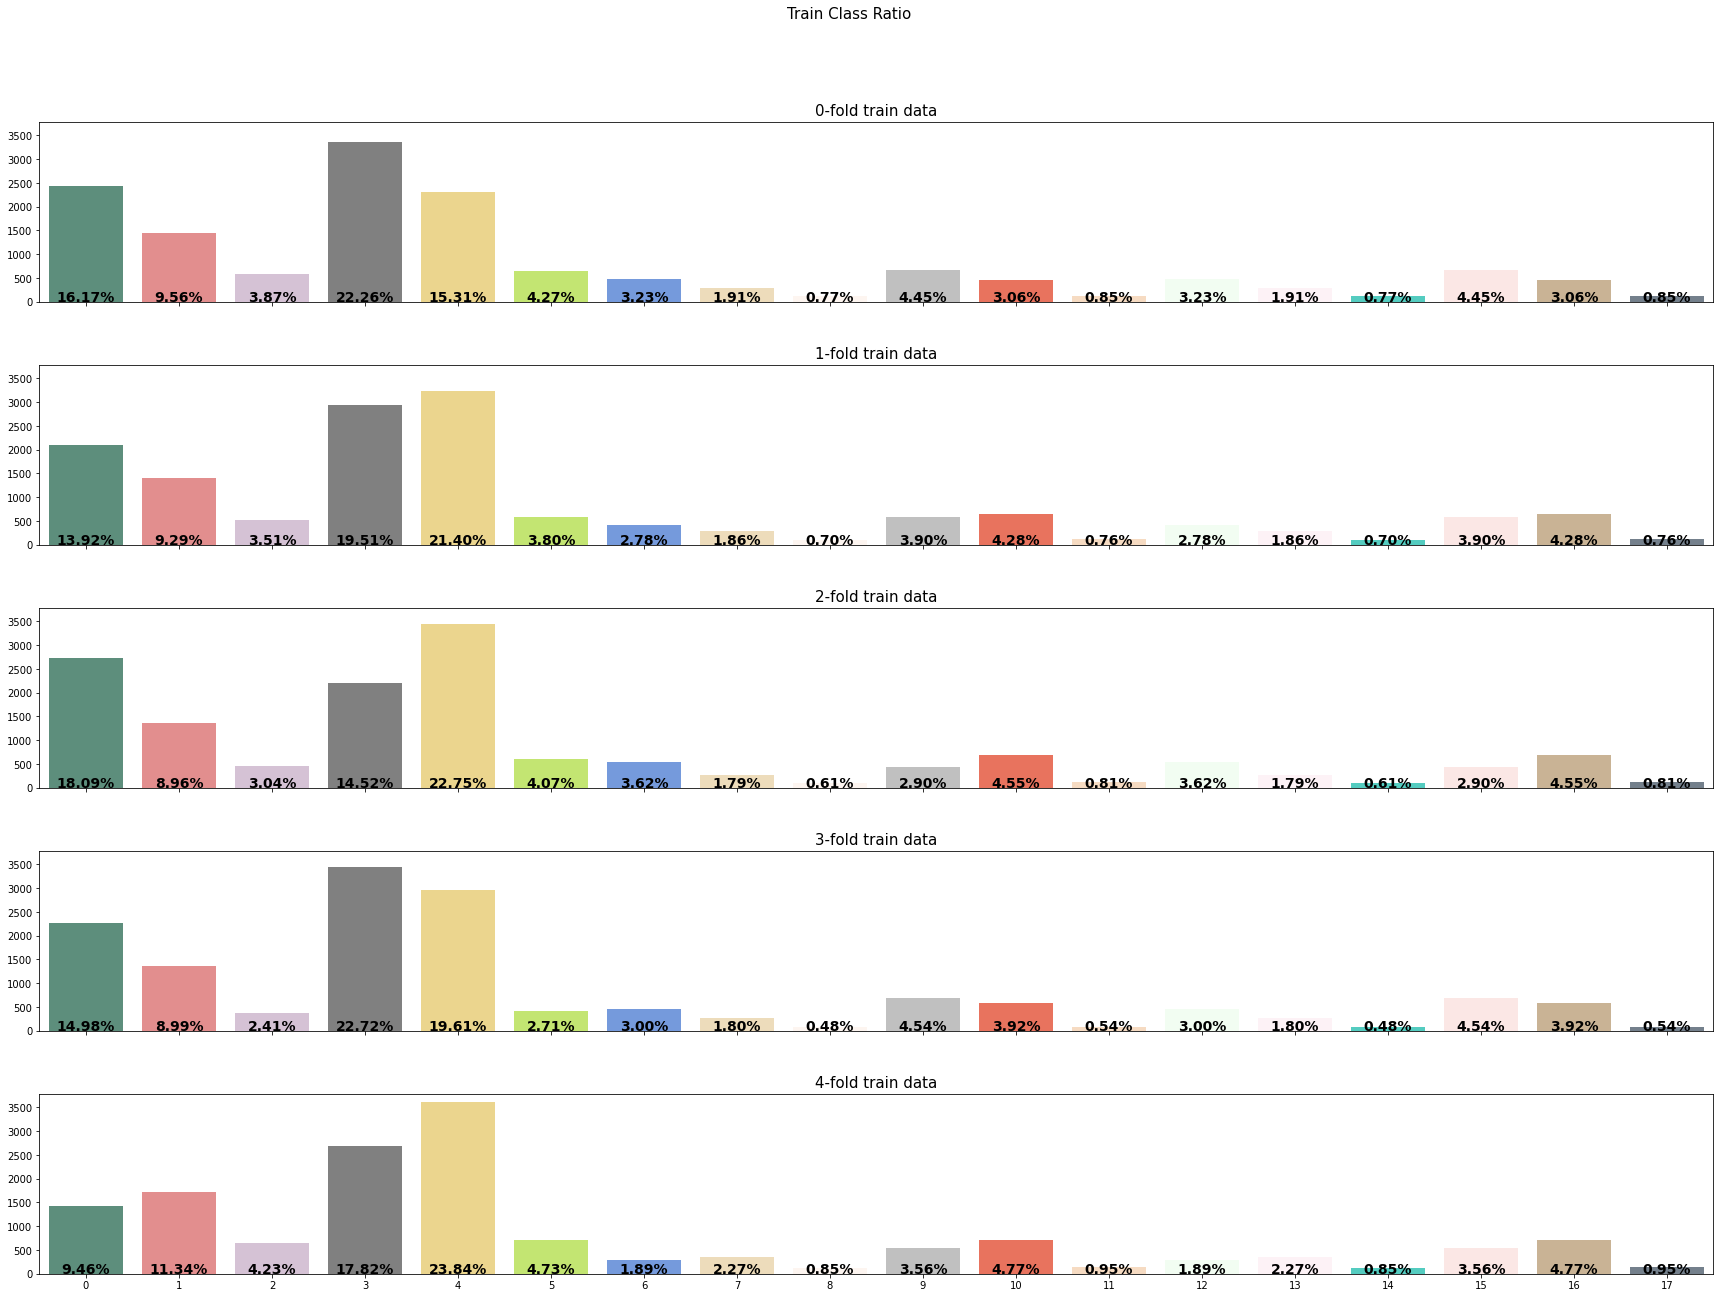

In [805]:
n_rows, n_cols = kfold, 1
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(30, 20))
fig.suptitle('Train Class Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = train_df_5[k]['class'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=[
        "#55967e", "lightcoral", "thistle", "grey", "#fbdd7e", "#cbf85f",
        "cornflowerblue", "wheat", "seashell", "silver", "tomato", "peachpuff", 
        "honeydew", "lavenderblush", "turquoise", "mistyrose", "tan", "slategrey"
    ])
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

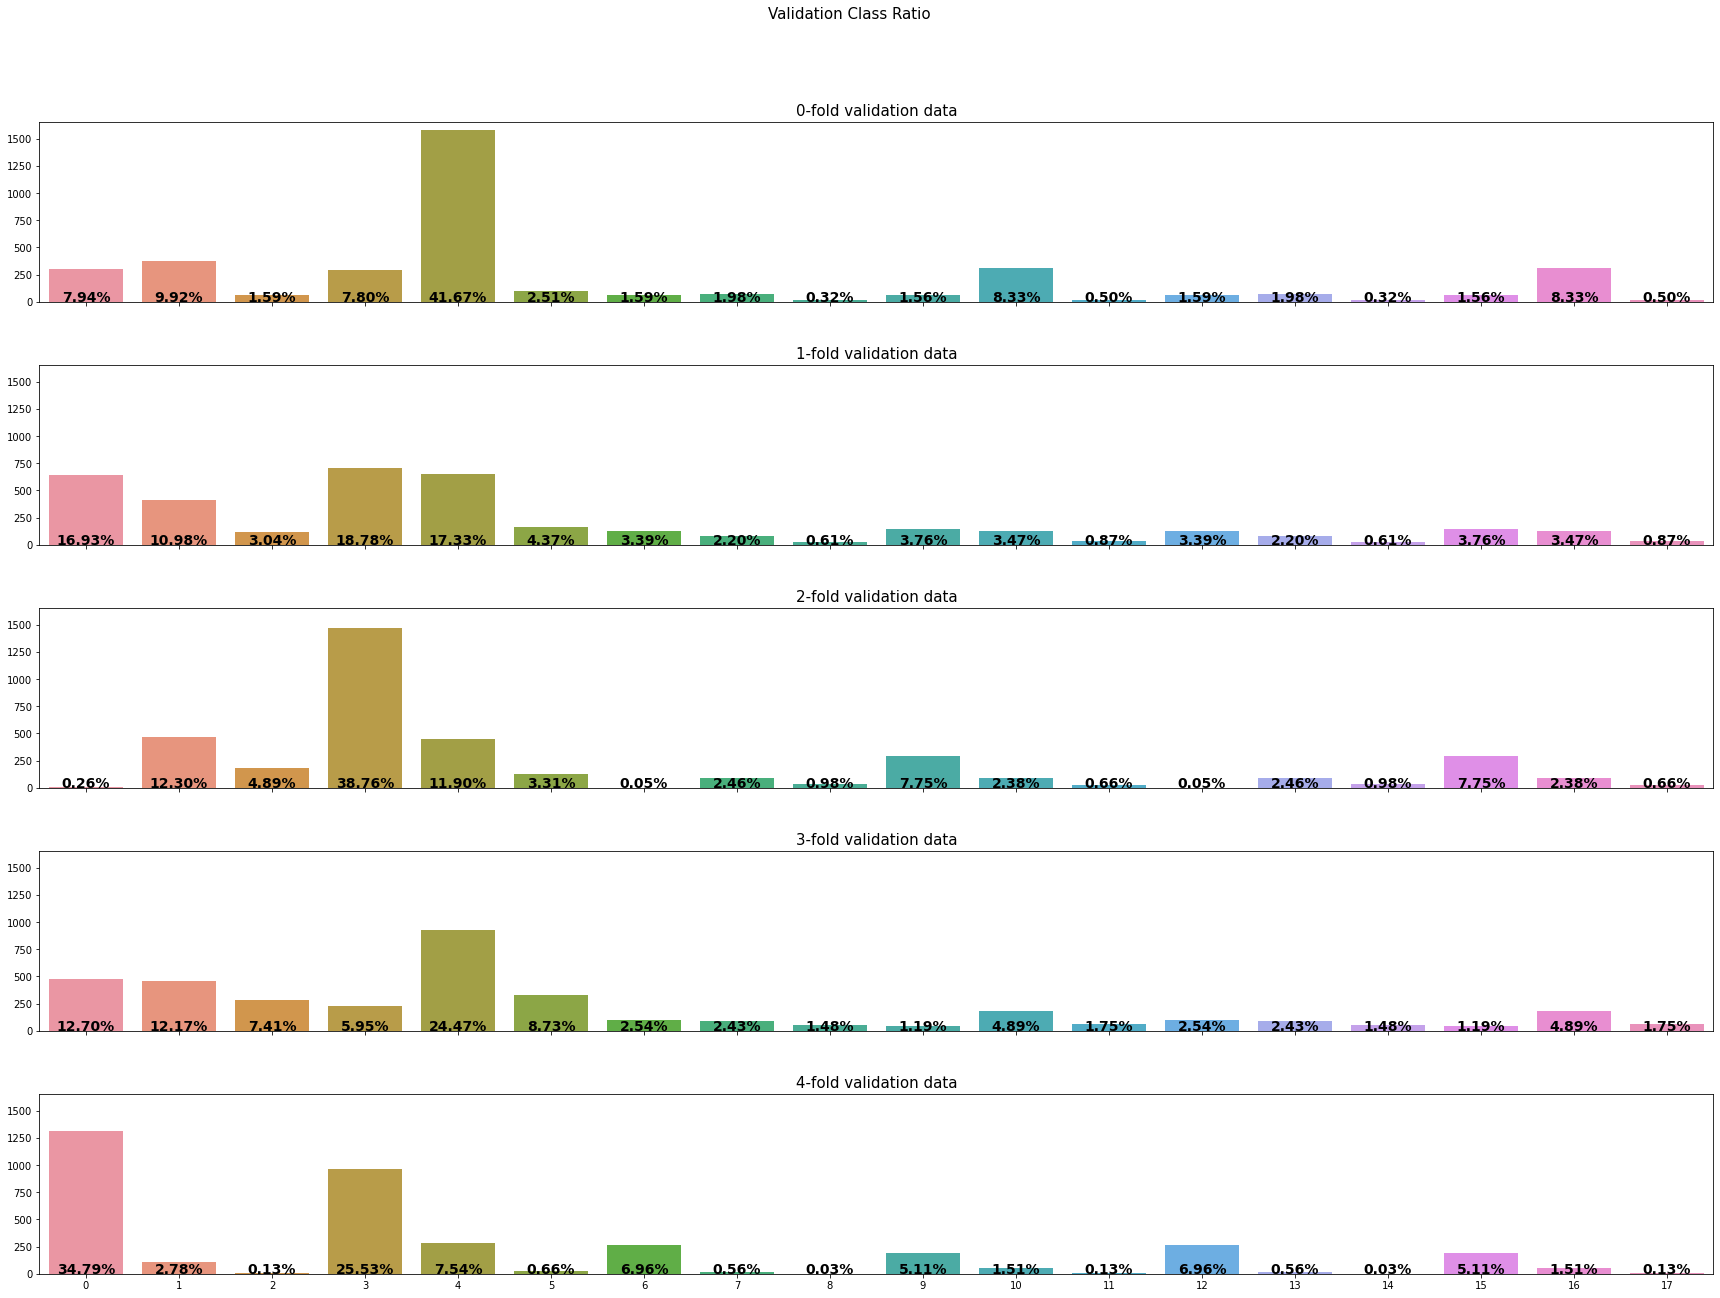

In [806]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(30, 20))
fig.suptitle('Validation Class Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = val_df_5[k]['class'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

### Mask
---

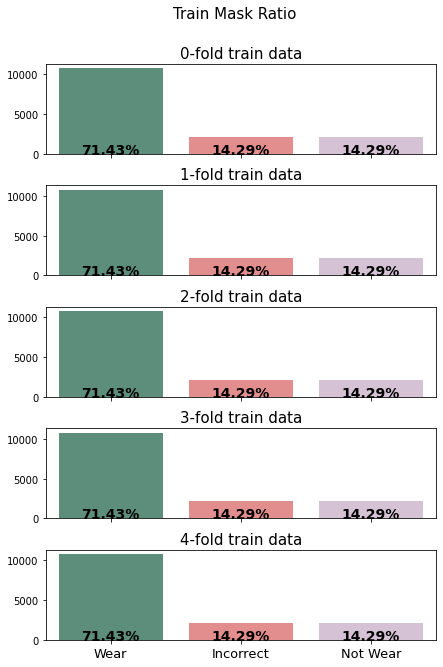

In [807]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(7, 10))
fig.suptitle('Train Mask Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = train_df_5[k]['mask'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=["#55967e", "lightcoral", "thistle"])
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["Wear","Incorrect", "Not Wear"], fontsize=13)
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

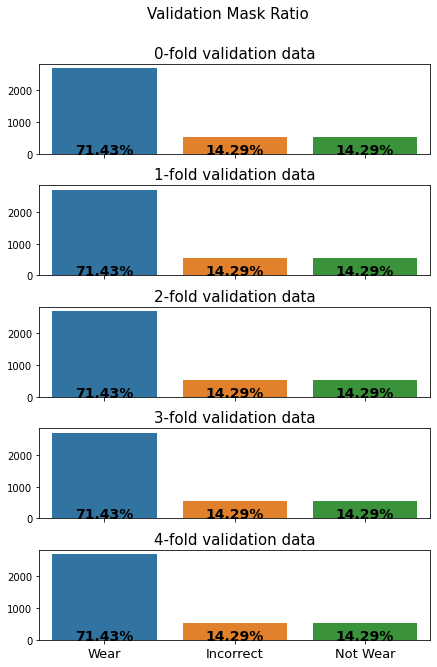

In [808]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(7, 10))
fig.suptitle('Validation Mask Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = val_df_5[k]['mask'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["Wear","Incorrect", "Not Wear"], fontsize=13)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

### Gender
---

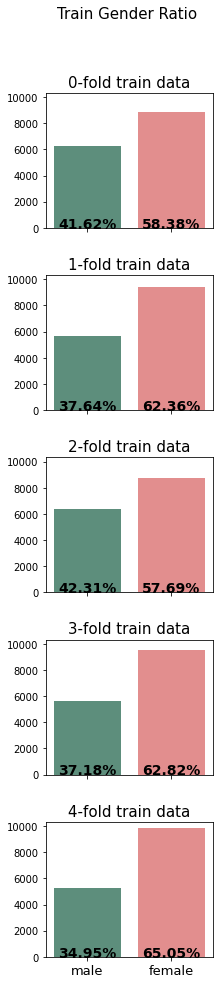

In [809]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(3, 15))
fig.suptitle('Train Gender Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = train_df_5[k]['gender'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=["#55967e", "lightcoral",])
    axes[k].set_xticks([0, 1])
    axes[k].set_xticklabels(["male","female"], fontsize=13)
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

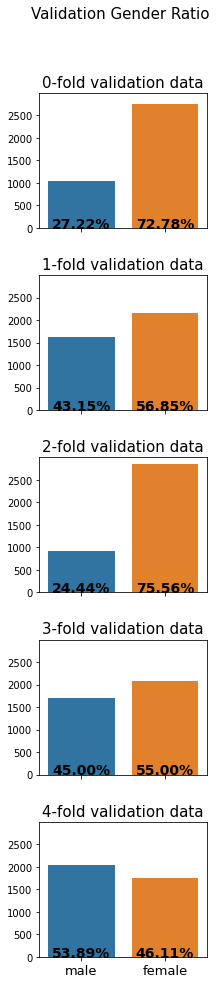

In [810]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(3, 15))
fig.suptitle('Validation Gender Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = val_df_5[k]['gender'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    axes[k].set_xticks([0, 1])
    axes[k].set_xticklabels(["male","female"], fontsize=13)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

### Age
---

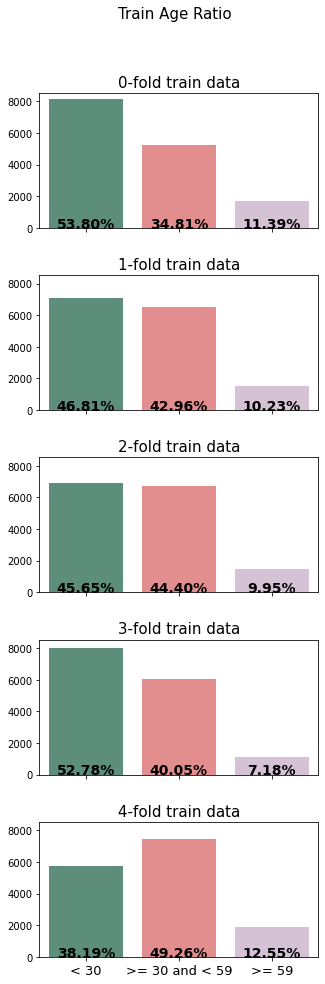

In [811]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(5, 15))
fig.suptitle('Train Age Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = train_df_5[k]['age'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=["#55967e", "lightcoral", "thistle"])
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["< 30", ">= 30 and < 59", ">= 59"], fontsize=13)
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

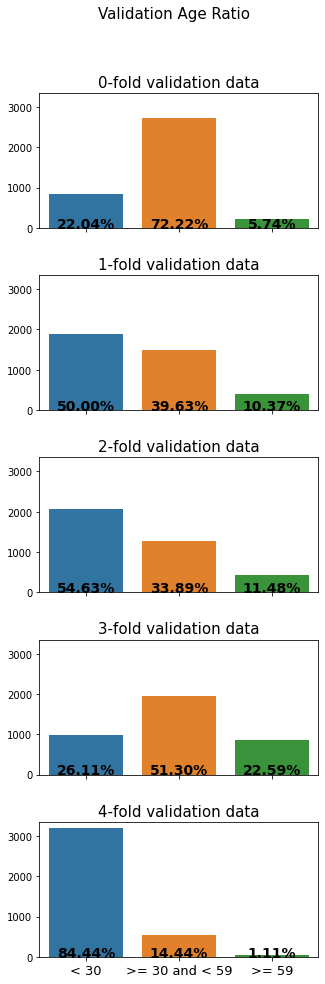

In [812]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(5, 15))
fig.suptitle('Validation Age Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = val_df_5[k]['age'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["< 30", ">= 30 and < 59", ">= 59"], fontsize=13)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

## Stratified K-Fold Label distribution
---

In [813]:
kfold = 5
s_train_df_5 = label_s_kfold_5_59_cfg['train']
s_val_df_5 = label_s_kfold_5_59_cfg['val']

### Class
---

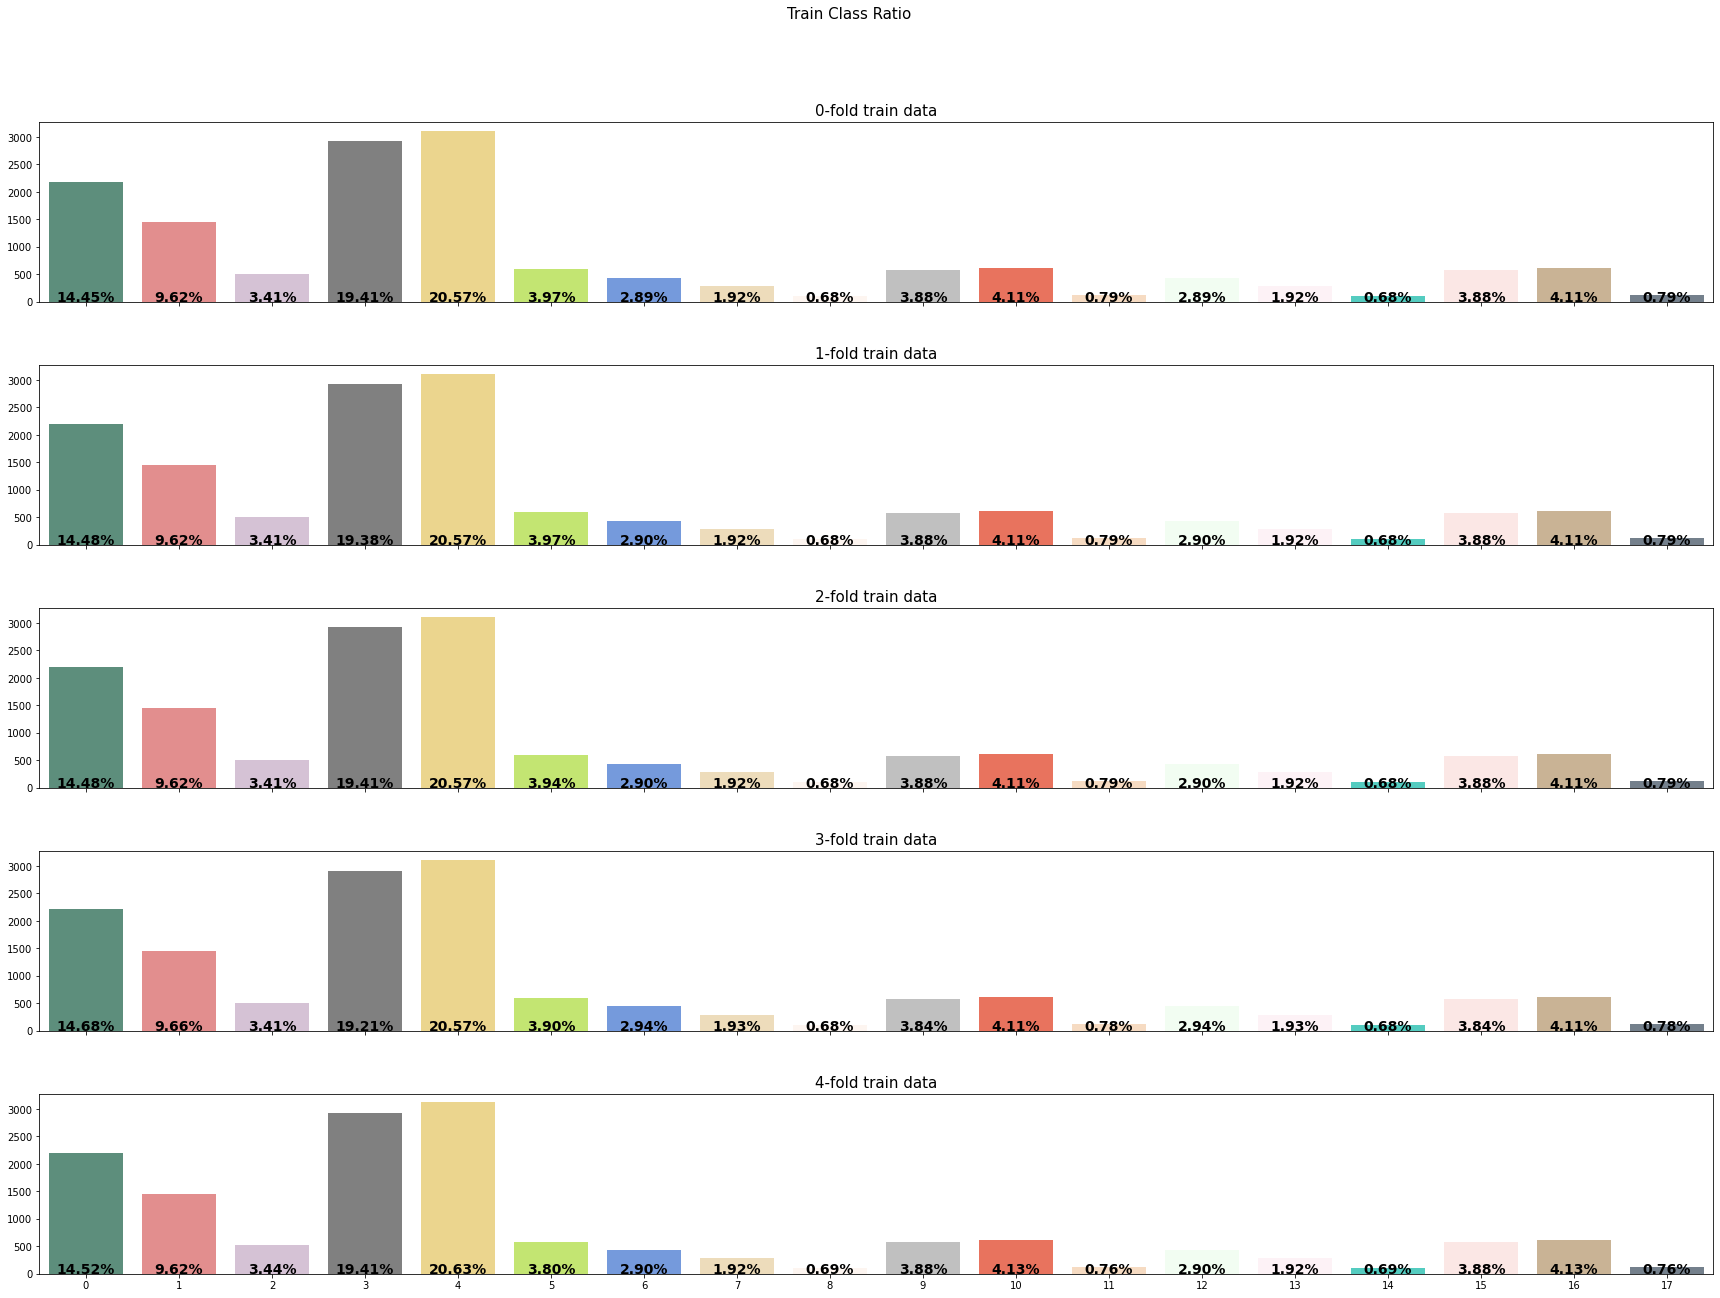

In [814]:
n_rows, n_cols = kfold, 1
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(30, 20))
fig.suptitle('Train Class Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = s_train_df_5[k]['class'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=[
        "#55967e", "lightcoral", "thistle", "grey", "#fbdd7e", "#cbf85f",
        "cornflowerblue", "wheat", "seashell", "silver", "tomato", "peachpuff", 
        "honeydew", "lavenderblush", "turquoise", "mistyrose", "tan", "slategrey"
    ])
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

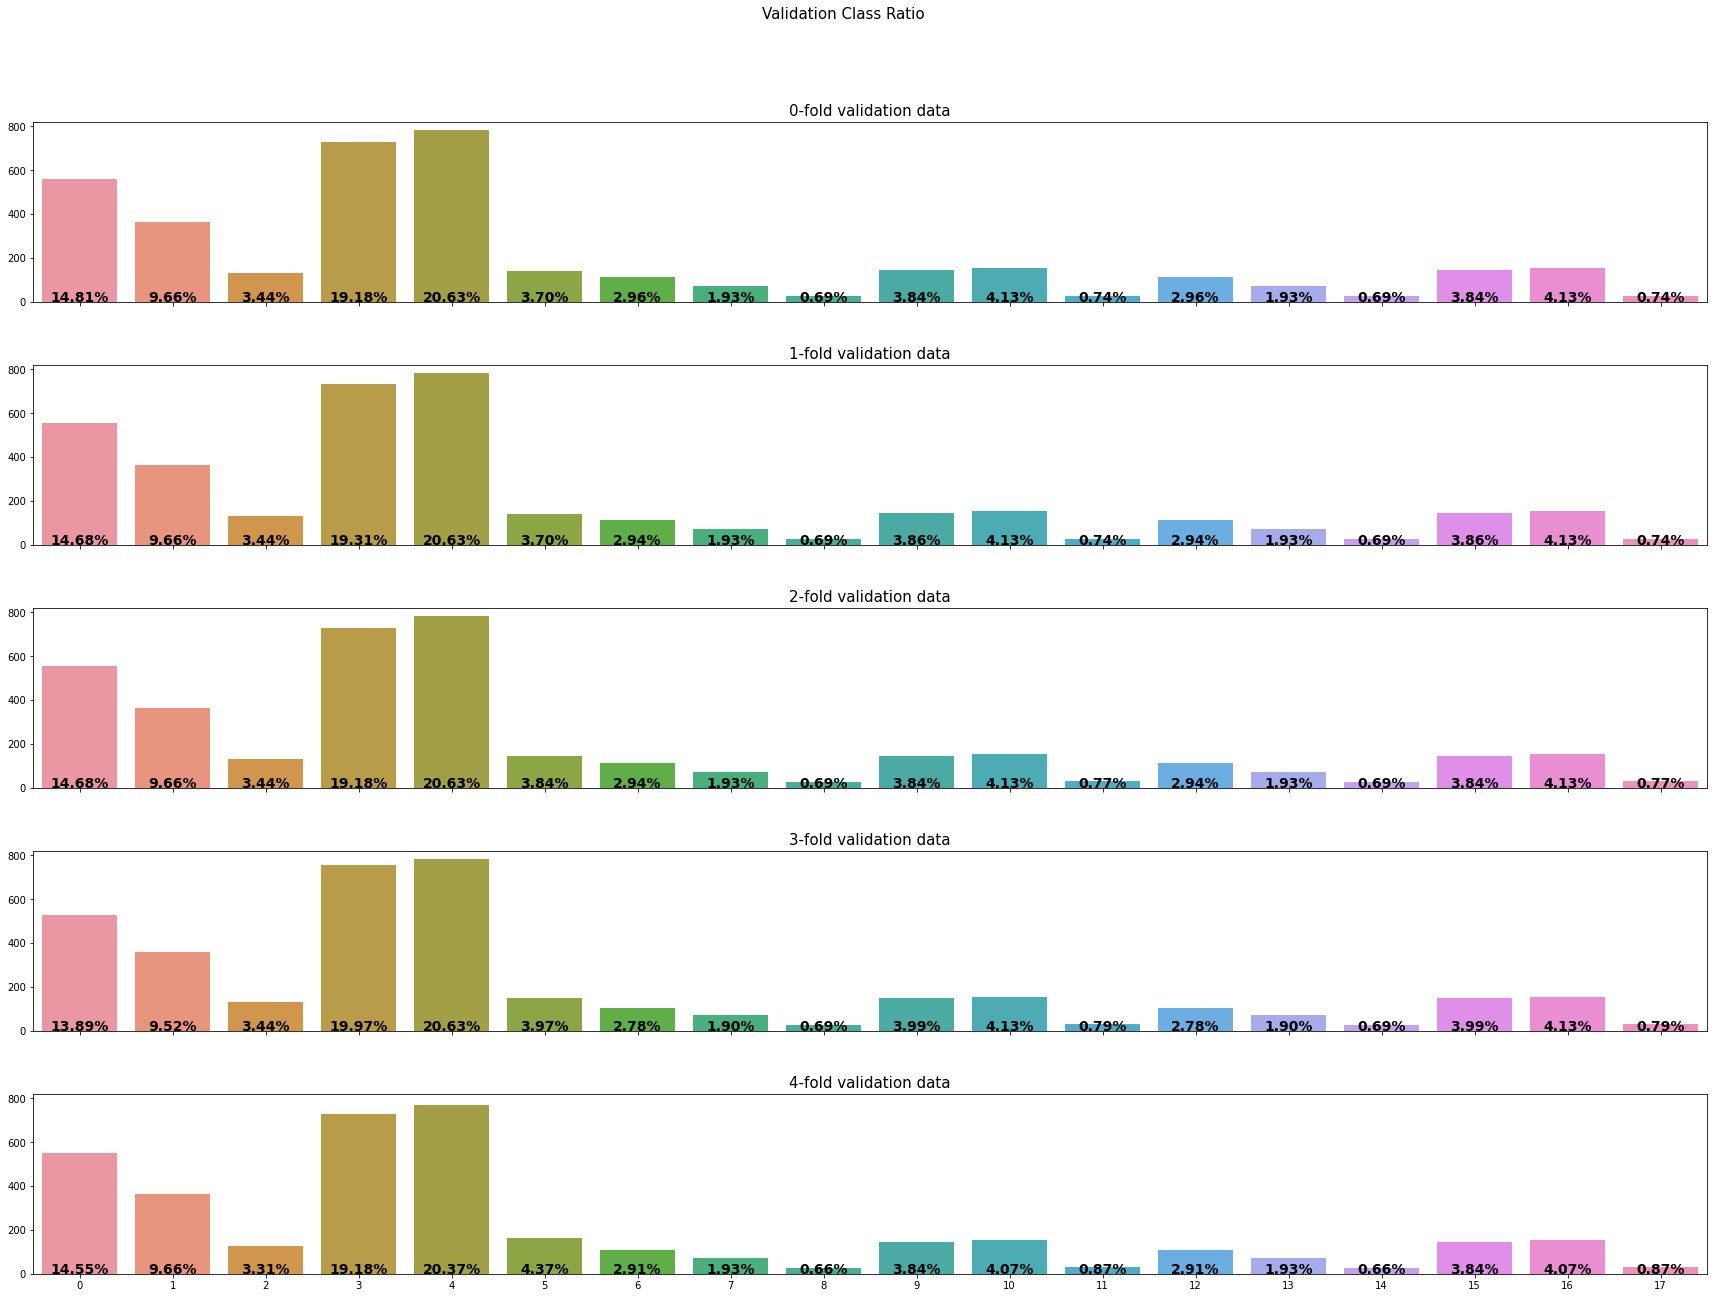

In [815]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(30, 20))
fig.suptitle('Validation Class Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = s_val_df_5[k]['class'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

### Mask
---

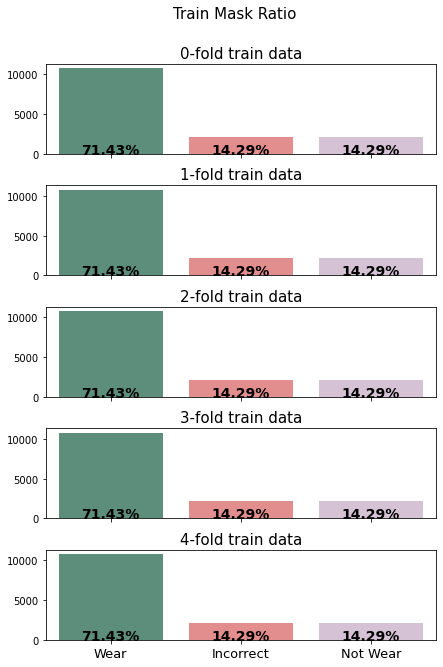

In [816]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(7, 10))
fig.suptitle('Train Mask Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = s_train_df_5[k]['mask'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=["#55967e", "lightcoral", "thistle"])
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["Wear","Incorrect", "Not Wear"], fontsize=13)
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

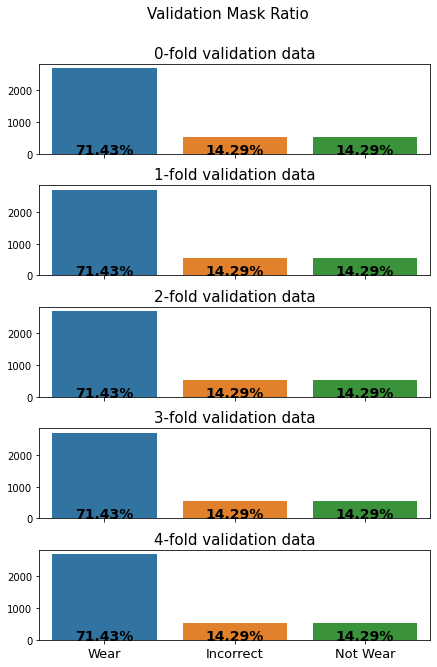

In [817]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(7, 10))
fig.suptitle('Validation Mask Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = s_val_df_5[k]['mask'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["Wear","Incorrect", "Not Wear"], fontsize=13)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

### Gender
---

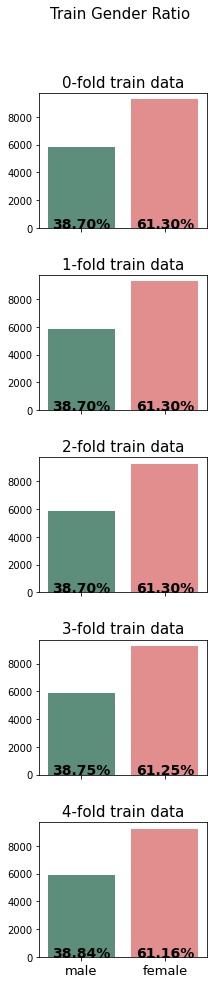

In [818]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(3, 15))
fig.suptitle('Train Gender Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = s_train_df_5[k]['gender'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=["#55967e", "lightcoral",])
    axes[k].set_xticks([0, 1])
    axes[k].set_xticklabels(["male","female"], fontsize=13)
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

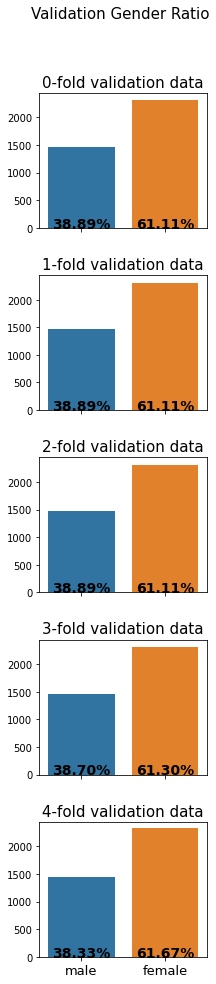

In [819]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(3, 15))
fig.suptitle('Validation Gender Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = s_val_df_5[k]['gender'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    axes[k].set_xticks([0, 1])
    axes[k].set_xticklabels(["male","female"], fontsize=13)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

### Age
---

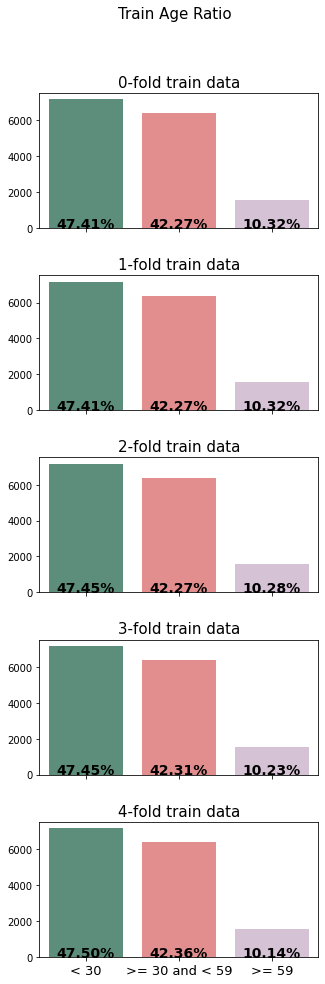

In [820]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(5, 15))
fig.suptitle('Train Age Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for k in range(kfold):
    train_counts = s_train_df_5[k]['age'].value_counts().sort_index()
    train_counts_pct = [f'{elem * 100:.2f}%' for elem in train_counts / train_counts.sum()]
    
    axes[k].set_title(f'{k}-fold train data', fontsize=15)        
    sns.barplot(ax=axes[k], x=train_counts.index, y=train_counts.values, palette=["#55967e", "lightcoral", "thistle"])
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["< 30", ">= 30 and < 59", ">= 59"], fontsize=13)
    
    for i, v in enumerate(train_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')

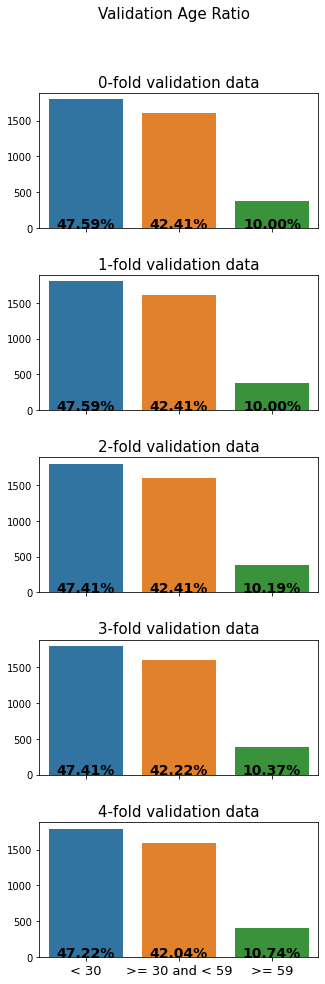

In [821]:
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(5, 15))
fig.suptitle('Validation Age Ratio', fontsize=15)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        

for k in range(kfold):
    val_counts = s_val_df_5[k]['age'].value_counts().sort_index()
    val_counts_pct = [f'{elem * 100:.2f}%' for elem in val_counts / val_counts.sum()]
    axes[k].set_title(f'{k}-fold validation data', fontsize=15)        
    sns.barplot(ax=axes[k], x=val_counts.index, y=val_counts.values)
    axes[k].set_xticks([0, 1, 2])
    axes[k].set_xticklabels(["< 30", ">= 30 and < 59", ">= 59"], fontsize=13)
    
    for i, v in enumerate(val_counts_pct):
        axes[k].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'k', fontweight = 'bold')